In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Intrusion").config("config.option","value").getOrCreate()

In [4]:
spark.stop()

In [317]:
rdd = spark.sparkContext.textFile('kddcup.data_10_percent.gz')
rdd.take(10)

['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.',
 '0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,

### Explore the format

In [318]:
rdd2 = rdd.map(lambda x: x.split(','))

print('num of features: ', len(rdd2.take(1)[0]))

rdd2.take(1)

num of features:  42


[['0',
  'tcp',
  'http',
  'SF',
  '181',
  '5450',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '8',
  '8',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  '1.00',
  '0.00',
  '0.00',
  '9',
  '9',
  '1.00',
  '0.00',
  '0.11',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  '0.00',
  'normal.']]

### Q5

In [363]:
rdd3 = rdd2.map(lambda x: x[:6]+[x[-1]])
df = rdd3.toDF(["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "label"])

df.show(10)

+--------+-------------+-------+----+---------+---------+-------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|  label|
+--------+-------------+-------+----+---------+---------+-------+
|       0|          tcp|   http|  SF|      181|     5450|normal.|
|       0|          tcp|   http|  SF|      239|      486|normal.|
|       0|          tcp|   http|  SF|      235|     1337|normal.|
|       0|          tcp|   http|  SF|      219|     1337|normal.|
|       0|          tcp|   http|  SF|      217|     2032|normal.|
|       0|          tcp|   http|  SF|      217|     2032|normal.|
|       0|          tcp|   http|  SF|      212|     1940|normal.|
|       0|          tcp|   http|  SF|      159|     4087|normal.|
|       0|          tcp|   http|  SF|      210|      151|normal.|
|       0|          tcp|   http|  SF|      212|      786|normal.|
+--------+-------------+-------+----+---------+---------+-------+
only showing top 10 rows



In [320]:
df.printSchema()

root
 |-- duration: string (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- src_bytes: string (nullable = true)
 |-- dst_bytes: string (nullable = true)
 |-- label: string (nullable = true)



In [329]:
import matplotlib.pyplot as plt
temp = df.groupBy('protocol_type').count().orderBy('count',ascending=True)
temp.show()

+-------------+------+
|protocol_type| count|
+-------------+------+
|          udp| 20354|
|          tcp|190065|
|         icmp|283602|
+-------------+------+



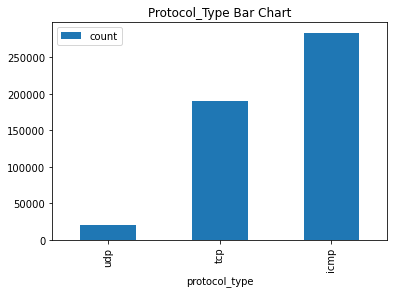

In [338]:
temp = temp.toPandas()
temp.plot.bar(x="protocol_type", y = "count")
plt.title("Protocol_Type Bar Chart")
plt.show()

In [339]:
temp = df.groupBy('service').count().orderBy('count',ascending=True)
temp.show()
temp = temp.toPandas()

+-----------+-----+
|    service|count|
+-----------+-----+
|     tftp_u|    1|
|      red_i|    1|
|    pm_dump|    1|
|      tim_i|    7|
|        X11|   11|
|      urh_i|   14|
|        IRC|   43|
|     Z39_50|   92|
|    netstat|   95|
|        ctf|   97|
|       name|   98|
|     kshell|   98|
|netbios_dgm|   99|
|       exec|   99|
|   http_443|   99|
|       ldap|  101|
|      pop_2|  101|
|       link|  102|
| netbios_ns|  102|
|        efs|  103|
+-----------+-----+
only showing top 20 rows



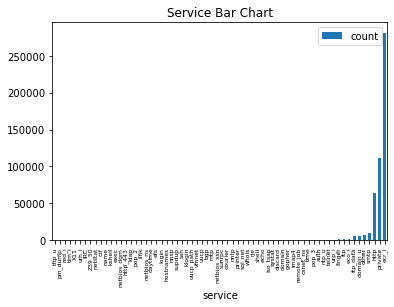

In [343]:
temp.plot.bar(x="service", y = "count")
plt.title("Service Bar Chart")
plt.xticks(rotation='vertical',fontsize=6)
plt.savefig('myimage.svg', format='svg', dpi=1200)
plt.show()

In [360]:
#Check Distributions of Flag feature
temp = df.groupBy('flag').count().orderBy('count',ascending=True)
temp.show()

+------+------+
|  flag| count|
+------+------+
|   OTH|     8|
|    S3|    10|
|RSTOS0|    11|
|    S2|    24|
|    S1|    57|
|    SH|   107|
|  RSTO|   579|
|  RSTR|   903|
|   REJ| 26875|
|    S0| 87007|
|    SF|378440|
+------+------+



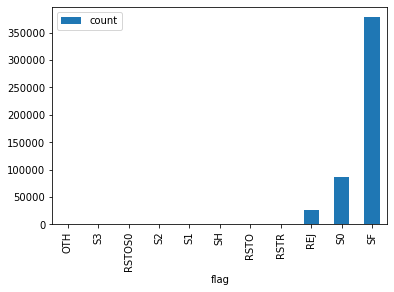

In [361]:
temp = temp.toPandas()
temp.plot.bar(x = "flag", y = "count")
plt.show()

In [347]:
#Check Distributions of 'duration' feature
dfpd = df.toPandas()
dfpd['duration'] = dfpd['duration'].astype(int)
dfpd['duration'].describe()

count    494021.000000
mean         47.979302
std         707.746472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       58329.000000
Name: duration, dtype: float64

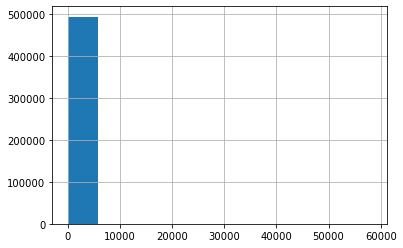

In [348]:
dfpd['duration'].hist()
plt.show()

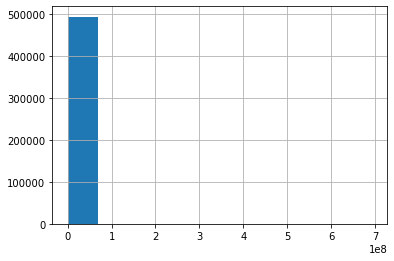

In [349]:
#Check Distributions of 'src_bytes' feature
dfpd['src_bytes'] = dfpd['src_bytes'].astype(float)
dfpd['src_bytes'].hist()
plt.show()

In [350]:
dfpd['src_bytes'].describe()

count    4.940210e+05
mean     3.025610e+03
std      9.882181e+05
min      0.000000e+00
25%      4.500000e+01
50%      5.200000e+02
75%      1.032000e+03
max      6.933756e+08
Name: src_bytes, dtype: float64

In [351]:
dfpd["dst_bytes"] = dfpd["dst_bytes"].astype(int)
dfpd['src_bytes'] = dfpd['src_bytes'].astype(int)
dfpd['duration'] = dfpd['duration'].astype(int)

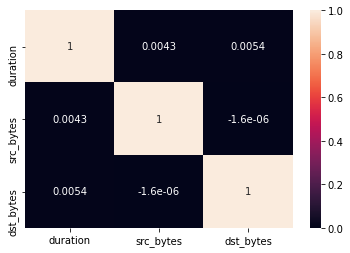

In [352]:
import seaborn as sns
sns.heatmap(dfpd.corr(),annot=True)
plt.show()

In [364]:
from pyspark.sql import functions as f
df = df.withColumn('label_new', f.when(f.col('label') ==  "normal.", "normal").otherwise("attack"))
df = df.drop(df.label)
df.show()

+--------+-------------+-------+----+---------+---------+---------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|label_new|
+--------+-------------+-------+----+---------+---------+---------+
|       0|          tcp|   http|  SF|      181|     5450|   normal|
|       0|          tcp|   http|  SF|      239|      486|   normal|
|       0|          tcp|   http|  SF|      235|     1337|   normal|
|       0|          tcp|   http|  SF|      219|     1337|   normal|
|       0|          tcp|   http|  SF|      217|     2032|   normal|
|       0|          tcp|   http|  SF|      217|     2032|   normal|
|       0|          tcp|   http|  SF|      212|     1940|   normal|
|       0|          tcp|   http|  SF|      159|     4087|   normal|
|       0|          tcp|   http|  SF|      210|      151|   normal|
|       0|          tcp|   http|  SF|      212|      786|   normal|
|       0|          tcp|   http|  SF|      210|      624|   normal|
|       0|          tcp|   http|  SF|      177| 

In [356]:
temp = df.groupBy('label_new').count()
temp.show()

+---------+------+
|label_new| count|
+---------+------+
|   normal| 97278|
|   attack|396743|
+---------+------+



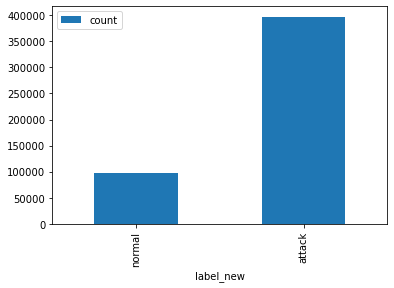

In [359]:
temp = temp.toPandas()
temp.plot.bar(x = "label_new", y = "count")
plt.show()

In [365]:
df_changed_dtypes =  df.selectExpr("cast(duration as int) duration",
                     "protocol_type",
                     "service",
                     "flag",
                     "cast(src_bytes as int) src_bytes",
                     "cast(dst_bytes as int) dst_bytes",
                     "label_new")

df_changed_dtypes.dtypes

[('duration', 'int'),
 ('protocol_type', 'string'),
 ('service', 'string'),
 ('flag', 'string'),
 ('src_bytes', 'int'),
 ('dst_bytes', 'int'),
 ('label_new', 'string')]

In [366]:
#Encoding the protocol type column
df_new = df_changed_dtypes.withColumn('protocol_type_encode', f.when(f.col('protocol_type') ==  "tcp", 1)\
                                      .when(f.col('protocol_type') ==  "udp", 2).otherwise(3))
df_new = df_new.drop(df.protocol_type)


df_new.show()

+--------+-------+----+---------+---------+---------+--------------------+
|duration|service|flag|src_bytes|dst_bytes|label_new|protocol_type_encode|
+--------+-------+----+---------+---------+---------+--------------------+
|       0|   http|  SF|      181|     5450|   normal|                   1|
|       0|   http|  SF|      239|      486|   normal|                   1|
|       0|   http|  SF|      235|     1337|   normal|                   1|
|       0|   http|  SF|      219|     1337|   normal|                   1|
|       0|   http|  SF|      217|     2032|   normal|                   1|
|       0|   http|  SF|      217|     2032|   normal|                   1|
|       0|   http|  SF|      212|     1940|   normal|                   1|
|       0|   http|  SF|      159|     4087|   normal|                   1|
|       0|   http|  SF|      210|      151|   normal|                   1|
|       0|   http|  SF|      212|      786|   normal|                   1|
|       0|   http|  SF|  

In [367]:
#Encoding the flag column
df_new = df_new.withColumn('flag_encode', f.when(f.col('flag') ==  "SF", 1)\
                           .when(f.col('flag') ==  "S0", 2)\
                           .when(f.col('flag') ==  "REJ", 3)\
                           .when(f.col('flag') ==  "RSTR", 4)\
                           .when(f.col('flag') ==  "RSTO", 5)\
                           .when(f.col('flag') ==  "SH", 6)\
                           .when(f.col('flag') ==  "S1", 7)\
                           .when(f.col('flag') ==  "S2", 8)\
                           .when(f.col('flag') ==  "RSTOS0", 9)\
                           .when(f.col('flag') ==  "S3", 10)\
                           .when(f.col('flag') ==  "OTH", 11))

df_new = df_new.drop(df.flag)

In [368]:
#Drop Service feature primarily because of too many same values, also encoding is hard for too many options

df_new = df_new.drop(df.service)
df_new.show()


+--------+---------+---------+---------+--------------------+-----------+
|duration|src_bytes|dst_bytes|label_new|protocol_type_encode|flag_encode|
+--------+---------+---------+---------+--------------------+-----------+
|       0|      181|     5450|   normal|                   1|          1|
|       0|      239|      486|   normal|                   1|          1|
|       0|      235|     1337|   normal|                   1|          1|
|       0|      219|     1337|   normal|                   1|          1|
|       0|      217|     2032|   normal|                   1|          1|
|       0|      217|     2032|   normal|                   1|          1|
|       0|      212|     1940|   normal|                   1|          1|
|       0|      159|     4087|   normal|                   1|          1|
|       0|      210|      151|   normal|                   1|          1|
|       0|      212|      786|   normal|                   1|          1|
|       0|      210|      624|   norma

In [369]:
#make target variable numeric attack = 1, normal = 0

df_new = df_new.withColumn('label_numeric', f.when(f.col('label_new') ==  "normal", 0).otherwise(1))

df_new.show()

+--------+---------+---------+---------+--------------------+-----------+-------------+
|duration|src_bytes|dst_bytes|label_new|protocol_type_encode|flag_encode|label_numeric|
+--------+---------+---------+---------+--------------------+-----------+-------------+
|       0|      181|     5450|   normal|                   1|          1|            0|
|       0|      239|      486|   normal|                   1|          1|            0|
|       0|      235|     1337|   normal|                   1|          1|            0|
|       0|      219|     1337|   normal|                   1|          1|            0|
|       0|      217|     2032|   normal|                   1|          1|            0|
|       0|      217|     2032|   normal|                   1|          1|            0|
|       0|      212|     1940|   normal|                   1|          1|            0|
|       0|      159|     4087|   normal|                   1|          1|            0|
|       0|      210|      151|  

In [370]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['duration', 'protocol_type_encode',  'flag_encode',
                                              'src_bytes','dst_bytes'],outputCol="features")
df_temp = vector_assembler.transform(df_new)
df_temp.show(3)

+--------+---------+---------+---------+--------------------+-----------+-------------+--------------------+
|duration|src_bytes|dst_bytes|label_new|protocol_type_encode|flag_encode|label_numeric|            features|
+--------+---------+---------+---------+--------------------+-----------+-------------+--------------------+
|       0|      181|     5450|   normal|                   1|          1|            0|[0.0,1.0,1.0,181....|
|       0|      239|      486|   normal|                   1|          1|            0|[0.0,1.0,1.0,239....|
|       0|      235|     1337|   normal|                   1|          1|            0|[0.0,1.0,1.0,235....|
+--------+---------+---------+---------+--------------------+-----------+-------------+--------------------+
only showing top 3 rows



In [371]:

from pyspark.ml.classification import RandomForestClassifier

(train,test) = df_temp.randomSplit([0.6,0.4],seed = 0)

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label_numeric')

model = rf.fit(train)

predictions = model.transform(test)

In [372]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label_numeric", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))


Accuracy = 0.984448026192798


In [373]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

predictions_labels = predictions.selectExpr("cast(prediction as double) prediction",
                                            "cast(label_numeric as double) label")
metrics = BinaryClassificationMetrics(predictions_labels.rdd)

In [374]:
TP = predictions_labels[(predictions_labels.label == 1) & (predictions_labels.prediction == 1)].count()
TN = predictions_labels[(predictions_labels.label == 0) & (predictions_labels.prediction == 0)].count()
FN = predictions_labels[(predictions_labels.label == 1) & (predictions_labels.prediction == 0)].count()
FP = predictions_labels[(predictions_labels.label == 0) & (predictions_labels.prediction == 1)].count()

In [375]:
recall = float(TP) / (TP + FN)
precision = float(TP) / (TP + FP)
f1 = 2 * ((precision * recall)/(precision + recall))

print("Recall:", recall)
print("Precision: ", precision)
print("F1 score:", f1)

Recall: 0.9947351868159517
Precision:  0.9860272845171588
F1 score: 0.990362094663143


In [376]:
metrics.areaUnderROC

0.9685903378412912

In [377]:
metrics.areaUnderPR

0.9855461825479681